<a href="https://colab.research.google.com/github/shahroz-dev/Neural_Network_based_Medical_Insurance_Charges_Prediction/blob/main/Neural_Network_bases_Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model

### Read the insurance dataset from github

In [2]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

In [3]:
# Make Column Tansformer for scaling and categroies encoding
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #Numerical columns for Normalization between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y set
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the colunm transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Visualize Normalize Training Data
X_train_normal 

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Build Neural Network

In [4]:
# Set random seed
tf.random.set_seed(42)

# Create early stopping Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 5, patience = 5)

# Build model
insurance_model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, name='Hidden_Layer_1'),
                             tf.keras.layers.Dense(10, name='Hidden_Layer_2'),
                             tf.keras.layers.Dense(1, name='Output_Layer')
])

# Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

### Model Summary

In [5]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 100)               1200      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                1010      
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


### Visualize Model Shape

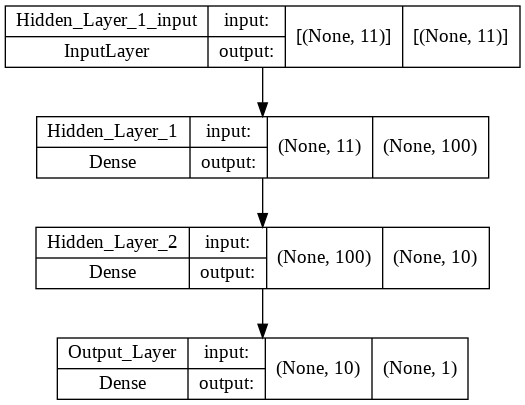

In [6]:
plot_model(model=insurance_model, show_shapes=True)

### Visualize Loss Function 

Text(0, 0.5, 'loss')

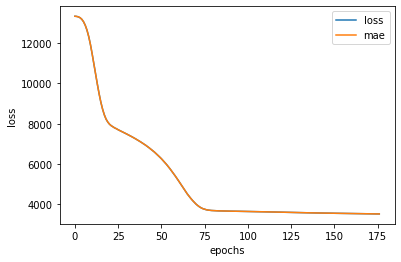

In [7]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

### Evaluate Model Scores

In [8]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3219.2771 - mae: 3219.2771


[3219.277099609375, 3219.277099609375]